# Laser interaction with a beam of partially stripped ions (excitation vs laser power)
<a href="http://www.inp.nsk.su/~petrenko/">A. Petrenko</a> (CERN-Novosibirsk, 2017-2019)

This notebook describes the kinematics of photon absorption and emission by a relativistic partially stripped ion beam and application of this process to ion beam cooling in a storage ring.

<img src=https://apetrenko.blob.core.windows.net/gamma-factory/lab_frame.svg width=100%>

In the ion's initial frame of reference:

<img src=https://apetrenko.blob.core.windows.net/gamma-factory/ion_frame.svg width=100%>

Let's use <a href=https://en.wikipedia.org/wiki/Four-vector>4-vectors</a> $(E/c, \boldsymbol{p})$ for the Lorentz transformations. Ion's 4-momentum is $(\gamma m c, \gamma m \boldsymbol{v})$, and the photon's 4-momentum is $(\hbar \omega / c, \hbar \boldsymbol{k})$. If the $Z$-axis is aligned with the direction of ion motion, then Lorentz transformation <a href=http://hyperphysics.phy-astr.gsu.edu/hbase/Relativ/vec4.html>can be written as</a>

$$
\left( \begin{array}{c}E'/c \\ p_x'\\ p_y'\\ p_z' \end{array} \right) =
\begin{pmatrix}
\gamma & 0 & 0 & -\beta\gamma \\
0 & 1 & 0 &  0 \\
0 & 0 & 1 &  0 \\
-\beta\gamma & 0 & 0 &  \gamma \\
\end{pmatrix}
\left( \begin{array}{c}E/c \\ p_x \\ p_y \\ p_z \end{array} \right).
$$

<img src=https://apetrenko.blob.core.windows.net/gamma-factory/Lorentz_transf_systems.svg width=100%>

Assuming that $k_x = -k\sin\theta$, $k_y = 0$, $k_z = -k\cos\theta$, and $k = \omega/c$ we can find the incoming photon parameters in the ion's frame of reference:

$$
\left( \begin{array}{c} 1 \\ -\sin\theta' \\ 0 \\ -\cos\theta' \end{array} \right) \frac{\omega'}{c} =
\begin{pmatrix}
\gamma & 0 & 0 & -\beta\gamma \\
0 & 1 & 0 &  0 \\
0 & 0 & 1 &  0 \\
-\beta\gamma & 0 & 0 &  \gamma \\
\end{pmatrix}
\left( \begin{array}{c} 1 \\ -\sin\theta \\ 0 \\ -\cos\theta \end{array} \right) \frac{\omega}{c}.
$$

Since $k = \omega/c$,

$$
\omega' = ( 1 + \beta \cos\theta )\gamma \omega \approx \left( 1 + \beta - \beta\frac{\theta^2}{2} \right) \gamma \omega \approx 2 \gamma \omega.\\
$$

Incoming angular spread in the beam of $\theta \sim 1$ mrad will be translated to a frequency error of only $\sim10^{-6}$ in the ion's frame of reference. Frequency mismatch is dominated by the energy spread in the ion beam (typically $\sim 10^{-4}$). It also means that the laser beam can cross the ion trajectory with an angle of several mrad at least.

$$
\omega' \sin\theta' = \omega \sin\theta,
$$

therefore $\theta'$ is very small

$$
\theta' \approx \frac{\theta}{2\gamma}.
$$


Excited ion after the photon absorption:

<img src=https://apetrenko.blob.core.windows.net/gamma-factory/excited_ion.svg width=100%>

And here is the ion after the photon emission:

<img src=https://apetrenko.blob.core.windows.net/gamma-factory/ion_after_emission.svg width=100%>

Photon emission will occur in a random direction. For simplicity let's assume that the photon was emitted in the same plane ($X',Z'$) at a random angle $\theta'_1$, i.e. $k'_{1x} = k'\sin\theta'_1$, $k'_{1z} = k'\cos\theta'_1$. Then inverse Lorentz transformation gives us the emitted photon parameters in the lab frame:

$$
\left( \begin{array}{c} 1 \\ ~\sin\theta_1 \\ 0 \\ \cos\theta_1 \end{array} \right) \frac{\omega_1}{c} =
\begin{pmatrix}
\gamma & 0 & 0 & \beta\gamma \\
0 & 1 & 0 &  0 \\
0 & 0 & 1 &  0 \\
\beta\gamma & 0 & 0 &  \gamma \\
\end{pmatrix}
\left( \begin{array}{c} 1 \\ ~\sin\theta'_1 \\ 0 \\ \cos\theta'_1 \end{array} \right) \frac{\omega'}{c}.
$$

Hence the scattered photon has the frequency $\omega_1 = \gamma(1 +\beta\cos\theta'_1)\omega' \approx 2\gamma^2(1 +\beta\cos\theta'_1) \omega$.

$$
\omega_1 \sin\theta_1 = \omega' \sin\theta'_1 ~\Rightarrow~ \sin\theta_1 = \frac{\sin\theta'_1} {\gamma(1 +\beta\cos\theta'_1)}.
$$

The typical $\theta_1 \sim 1/\gamma$.

Small fraction of photons is emitted with $\theta_1 \sim 1$ and in this case to separate forward and backward emission it's important to know $\cos\theta_1$:

$$
\omega_1 \cos\theta_1 = \omega'\gamma(\beta + \cos\theta_1') ~\Rightarrow~ \cos\theta_1 = \frac{\beta + \cos\theta_1'}{1 +\beta\cos\theta'_1}
$$

### Let's consider Li-like Pb example

Consider Li-like Pb transition $2s-2p_{1/2}$. The data from: <a href=https://doi.org/10.1103/PhysRevA.44.7144>Calculations of 2p lifetimes in the Li sequence</a>. C. E. Theodosiou, L. J. Curtis, and M. El-Mekki. Phys. Rev. A 44, 7144 (1991):

In [1]:
# Excitation energy:
hw0 = 230.823 # eV (ħω0)

# lifetime:
tau_0 = 76.6e-12 # sec

g1 = 2; g2 = 2 # degeneracy factors

In [2]:
import numpy as np
from IPython.display import Latex

import warnings
warnings.filterwarnings('ignore')

In [3]:
A = 207.98 # Atomic mass
mc = A*0.931e9 # eV/c
mc2 = mc # eV
Z = 82  # Number of protons in the ion (Lead)
Ne = 3 # Number of remaining electrons (Lithium-like)
Qe = 1.60217662e-19 # elementary charge in Coulombs

gamma_p = 236/0.938 # equvalent gamma for the protons in the SPS
gamma = gamma_p*(Z-Ne)*0.938e9/mc # Lorentz factor of the ion
gamma_0 = gamma # defined for later use below
beta_0 = np.sqrt(1-1/(gamma_0*gamma_0))

# Corresponding photon energy in the lab frame will be
hc = 0.19732697e-6 # eV*m (ħc)
lambda_0 = 2*np.pi*hc/hw0 # m

hw = hw0/(2*gamma) # eV (ħω)

# max energy of scattered photons will be

hw1 = 4*gamma*gamma*hw

Latex(r"""
\begin{aligned}

\gamma         &= %.1f \\
\hbar \omega'  &= %.1f~\rm{eV} ~~ (\lambda' = %.1f~ \mathrm{nm}) \\
\hbar \omega~   &= %.2f~\rm{eV} ~~ (\lambda = %.1f~ \mathrm{nm}) \\
\hbar \omega_{1, \rm{max}}   &= %.0f~\rm{keV} \\

\end{aligned}
""" % (gamma, hw0, 1e9*lambda_0, hw, 1e9*2*np.pi*hc/hw, hw1/1e3))

<IPython.core.display.Latex object>

Typical transverse kick obtained by an ion due to the photon scattering is very small compared to the typical angular spread in the beam:

In [4]:
px = hw1/gamma_0 # eV/c
pz = gamma_0*mc*beta_0 # eV/c
p0 = pz # defined for later use below
kick = (px/pz)*1000 # mrad
print('(px ~ %.2f keV, pz = %.2f TeV) Typical transverse kick ~ %.0e mrad' % (px/1e3, pz/1e12, kick))

(px ~ 0.46 keV, pz = 18.64 TeV) Typical transverse kick ~ 2e-08 mrad


### Ion beam definition

In [5]:
N_ions = 0.9e8  # Number of ions in the beam
Np = 500000 # number of ion macro-particles in this simulation

Twiss parameters in the laser-ion interaction point (see the <a href=https://apetrenko.blob.core.windows.net/sps/SPS_optics_Q26.html>MAD-X SPS optics output</a> for details):

In [6]:
beta_x  =  54.614389 # m
alpha_x = -1.535235
beta_y  =  44.332517 # m
alpha_y =  1.314101

Dx  =  2.444732 # m
Dpx =  0.097522

Dy  =  0.0 # m
Dpy =  0.0

L = 6911.5038 # m length of the ring

Ion beam parameters:

In [7]:
emitt_n = 1.5e-6 # m*rad (normalized emittance)
emitt = emitt_n/gamma

sigma_z = 0.063 # m
sigma_dp = 2e-4 # relative momentum spread

Distribution in $z$ and $\delta p = \frac{\Delta p}{p}$ can be defined easily since they are not correlated:

In [8]:
z  = np.random.normal(scale=sigma_z, size=Np)
dp = np.random.normal(scale=sigma_dp, size=Np)

Transverse coordinates are more complicated. Similar to <a href=https://ops.aps.anl.gov/manuals/elegant_latest/elegant.html>Elegant</a> first we generate the beam in the normalized coordinates, defined as

$$
\begin{aligned}
u~ &= \frac{x}{\sqrt{\beta_x}} \\
u' &= \frac{x'}{\sqrt{\beta_x}} + \frac{x\alpha_x}{\beta_x\sqrt{\beta_x}}.
\end{aligned}
$$
And $\sigma_u = \sqrt{\epsilon_x}$, $\sigma_{u'} = \sigma_u/\beta_x$.

$u$ and $u'$ are uncorrelated, therefore it's easy to generate their distribution:

In [9]:
u  = np.random.normal(scale=np.sqrt(emitt), size=Np)
up = np.random.normal(scale=np.sqrt(emitt)/beta_x, size=Np)

Now we need to apply the inverse transformation from $(u,u')$ to $(x,x')$:
$$
\begin{aligned}
x~ &= u\sqrt{\beta_x} \\
x' &= u'\sqrt{\beta_x} - u \frac{\alpha_x}{\sqrt{\beta_x}}.
\end{aligned}
$$


In [10]:
x  = u*np.sqrt(beta_x) # m
xp = up*np.sqrt(beta_x) - u*alpha_x/np.sqrt(beta_x) # rad

The same for y-plane:

In [11]:
u  = np.random.normal(scale=np.sqrt(emitt), size=Np)
up = np.random.normal(scale=np.sqrt(emitt)/beta_y, size=Np)

y  = u*np.sqrt(beta_y) # m
yp = up*np.sqrt(beta_y) - u*alpha_y/np.sqrt(beta_y) # rad

Let's plot these distributions:

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
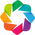

In [12]:
import holoviews as hv
hv.extension('matplotlib', 'bokeh')

In [13]:
%output backend='matplotlib' fig='png' size=150

In [14]:
%opts Points Curve [show_grid=True]
%opts Points (alpha=0.1 s=0.2) [aspect=2]
#%opts Points (alpha=0.5) [aspect=2]

In [15]:
dim_x  = hv.Dimension('x',  unit='mm', range=(-8,+8))
dim_xp = hv.Dimension('xp', unit='mrad', label="x'", range=(-0.16,+0.16))

dim_y  = hv.Dimension('y',  unit='mm', range=(-8,+8))
dim_yp = hv.Dimension('yp', unit='mrad', label="y'", range=(-0.16,+0.16))

dim_z  = hv.Dimension('z',  unit='mm', range=(-250.0,+250.0))
#dim_dp = hv.Dimension('dp', label='100%*Δp/p')
dim_dp = hv.Dimension('dp', label='100%*$\Delta p/p$', range=(-0.15,+0.15))

:Points   [y,yp]
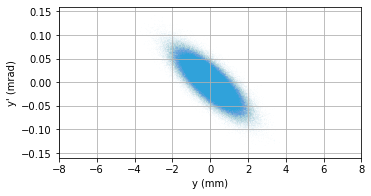

In [16]:
hv.Points((y*1e3, yp*1e3), kdims=[dim_y,dim_yp])

:Points   [z,dp]
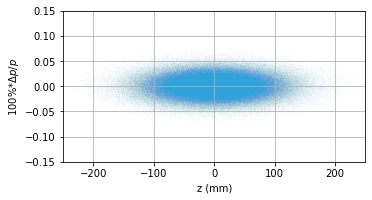

In [17]:
hv.Points((z*1e3,dp*100), kdims=[dim_z,dim_dp])

As a crosscheck we can calculate the RMS-emittance of this beam using the statistical definition of emittance $\epsilon_{RMS} = \sqrt{\left<x^2\right> \left<x'^2\right> - \left<xx'\right>^2}$.

In [18]:
emitt_RMS = np.sqrt(np.mean(x*x)*np.mean(xp*xp) - np.mean(x*xp)*np.mean(x*xp))
#emitt_RMS = np.sqrt(np.mean(y*y)*np.mean(yp*yp) - np.mean(y*yp)*np.mean(y*yp))

Latex("Normalized $\epsilon_{RMS}$ = %.2f mm*mrad (compared to %.2f mm*mrad set originally)."
      % (emitt_RMS*1e6*gamma, emitt_n*1e6))

<IPython.core.display.Latex object>

$\epsilon_{RMS}$ will be closer to the input value with more macro-particles per bunch.

And finally the effect of transverse dispersion function can be included as $x = x + D_x \frac{\Delta p}{p}$ and $x' = x' + D'_x\frac{\Delta p}{p}$.

In [19]:
x = x + Dx*dp; xp = xp + Dpx*dp
y = y + Dy*dp; yp = yp + Dpy*dp

:Layout
   .Points.I  :Points   [x,xp]
   .Points.II :Points   [y,yp]
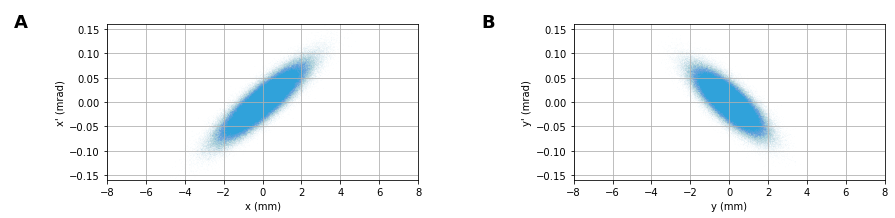

In [20]:
hv.Points((x*1e3,xp*1e3), kdims=[dim_x,dim_xp]) + hv.Points((y*1e3,yp*1e3), kdims=[dim_y,dim_yp])

For comparison with other programs let's print out the RMS sizes of the ion beam:

In [21]:
sigma_x = np.sqrt(np.mean(x*x)) # m
sigma_y = np.sqrt(np.mean(y*y)) # m

Latex("RMS sizes of the ion beam $\sigma_x$ = %.2f mm, $\sigma_y$ = %.2f mm "
      % (sigma_x*1e3, sigma_y*1e3))

<IPython.core.display.Latex object>

:Points   [dp,x]
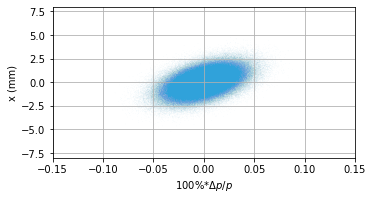

In [22]:
hv.Points((dp*100,x*1e3), kdims=[dim_dp,dim_x])

## Laser beam

To define the laser beam we define several parameters (assuming <a href=https://en.wikipedia.org/wiki/Gaussian_beam>Gaussian beam</a>):
<ol>
<li>laser wavelength $\lambda_l$,
<li>a vector to the laser focal point $\boldsymbol{a}=(a_x,a_y,a_z)$,
<li>a vector of laser direction of propagation $\boldsymbol{n}=(n_x,n_y,n_z)$,
<li>laser waist radius $w_0$,
<li>delay of the laser pulse with respect to the ion beam (i.e. the laser pulse reaches its focal point at the moment $t=t_l$).
</ol>

We assume that the laser pulse length is much shorter than the length of the ion bunch (with this approach a long laser pulse can be represented as a sequence of several short pulses). In this case for every particle we can calculate the moment and location of its collision with the laser wavefront.

In [23]:
# Position of the laser center in space and time:

ax = 0; ay = 0; az = 0 # m
t_l = 0.0 # sec

# i.e. some ions collide with the laser at t < 0,
# before it reaches the center of the ion beam.
# So the tracking should start at some t < 0.

We assume that the laser crosses the ion beam trajectory with an angle $\theta_l$:

In [24]:
#theta_l = 5.0*np.pi/180 # rad
theta_l = 2.6*np.pi/180 # rad
#theta_l = 1.0*np.pi/180 # rad

Then $n_x = 0$, $n_y = -\sin\theta_l$, $n_z = -\cos\theta_l$.

In [25]:
nx = 0; ny = -np.sin(theta_l); nz = -np.cos(theta_l)

And because of this angle the resonant wavelength of the laser should be shifted from $\lambda_0$ as

$$
\lambda_l = \frac{\lambda_0}{2}(1 + \beta_0 \cos\theta_l).
$$

In [26]:
lambda_l = (2*np.pi*hc/hw)*(1 + beta_0*np.cos(theta_l))/2 # m

# Shift laser wavelength for fast longitudinal cooling
#lambda_l = lambda_l*(1+sigma_dp)

Latex(r"$\lambda_l$ = %.1f nm" % (lambda_l*1e9))

<IPython.core.display.Latex object>

In [27]:
w_0 = 1.3e-3 # m
#w_0 = 2.0e-3 # m
#w_0 = 4.0e-3 # m
#w_0 = 0.2e-3 # m

The corresponding Rayleigh length is
$$
z_R = \frac{\pi w_0^2} {\lambda_l}.
$$

In [28]:
z_R = np.pi*w_0*w_0/lambda_l
Latex("$z_R$ = %.2f m" % z_R)

<IPython.core.display.Latex object>

In [29]:
Latex(r"Divergence of the laser beam $\theta = \frac{\lambda_l}{\pi w_0} = %.2f$ mrad." %
      (1e3*lambda_l/(np.pi*w_0)))

<IPython.core.display.Latex object>

## Collision of the ion beam with the laser pulse

The position of the laser beam center is $\boldsymbol{r}_l = \boldsymbol{a} + c(t-t_l)\boldsymbol{n}$. We can find the moment when a particle with a position $\boldsymbol{r} = \boldsymbol{r}_0 + \boldsymbol{v}t$ collides with the laser as the moment when $\boldsymbol{r}-\boldsymbol{r}_l$ is perpendicular to $\boldsymbol{n}$. Then $(\boldsymbol{r}-\boldsymbol{r}_l, \boldsymbol{n})=0$, which yields the equation

$$
(\boldsymbol{r}_0, \boldsymbol{n}) + (\boldsymbol{v}, \boldsymbol{n})t - (\boldsymbol{a}, \boldsymbol{n}) - c(t-t_l)(\boldsymbol{n}, \boldsymbol{n}) = 0.
$$

Therefore the moment of ion-photon collision is
$$
t_\mathrm{col} = \frac{(\boldsymbol{r}_0 - \boldsymbol{a}, \boldsymbol{n}) + ct_l}{c - (\boldsymbol{v}, \boldsymbol{n})}.
$$

In [30]:
c = 299792458 # m/s

In [31]:
vz = c*beta_0

vx = vz*xp
vy = vz*yp

In [32]:
t_col = ((x-ax)*nx + (y-ay)*ny + (z-az)*nz + c*t_l) / (c - (vx*nx+vy*ny+vz*nz)) # sec

For every particle we can find the location of its collision with the laser pulse as $\boldsymbol{r} = \boldsymbol{r}_0 + \boldsymbol{v}t$:

In [33]:
x_col = x + vx*t_col # m
y_col = y + vy*t_col # m
z_col = z + vz*t_col # m

As a test let's plot the location of all ions which have already passed the laser pulse at $t=0$:

:Points   [z,y]
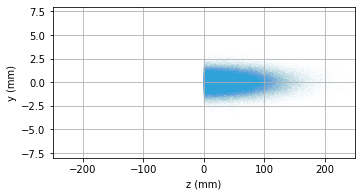

In [34]:
hv.Points((z[t_col<0]*1e3, y[t_col<0]*1e3), kdims=[dim_z,dim_y])

Now we need to determine if the photon is absorbed and the ion is excited according to the laser beam intensity and angle at the location of the interaction point.

At the moment of the ion collision with the laser pulse its intensity $I$ is given by the expression

$$
I = I_0 \frac{w^2_0}{w^2} \exp \left(-\frac{2(\boldsymbol{r} - \boldsymbol{r}_l)^2}{w^2}\right),$$

where $\boldsymbol{r} - \boldsymbol{r}_l$ is the distance to the laser center, $I_0$ is the maximum intensity at the focal point $\boldsymbol{a}$, and the laser beam width $w$ is evolving with the distance to the focal point as

$$
w = w_0 \sqrt{1 + \left(\frac{\boldsymbol{r}_l - \boldsymbol{a}}{z_R}\right)^2}.
$$

Also the radius of wavefront curvature $R$ can be written as

$$
R = |\boldsymbol{r}_l - \boldsymbol{a}| \left[ 1 + \left(\frac{z_R}{\boldsymbol{r}_l - \boldsymbol{a}}\right)^2 \right].
$$

The total laser pulse energy $J_l$ can be integrated as

$$
J_l = \Delta t_l \int\limits_{S} I dS =
\Delta t_l I_0 \int\limits_{0}^{\infty} \exp \left(-\frac{2r^2}{w_0^2}\right) 2 \pi rdr =
\Delta t_l \frac{I_0 \pi w_0^2}{2},
$$

where $\Delta t_l$ is the laser pulse duration (assuming uniform temporal profile). The same expression assuming the Gaussian temporal pulse profile can be written as

$$
J_l = \int\limits_{-\infty}^{+\infty} \exp \left( -\frac{t^2}{2\sigma_t^2} \right) dt \int\limits_{S} I dS =
\sqrt{2\pi} \sigma_t I_0 \int\limits_{0}^{\infty} \exp \left(-\frac{2r^2}{w_0^2}\right) 2 \pi rdr =
\sqrt{2\pi} \sigma_t \frac{I_0 \pi w_0^2}{2},
$$

To calculate the probabilistic ion excitation with a given process cross-section we only need the density of photons (and their incoming angle which is slightly varying due to the wavefront curvature) at the location of every ion. The total number of photons per pulse

$$
N_{\hbar \omega} = \frac{J_l} {\hbar \omega}.
$$

While the surface density of photons (number of photons per unit surface) is proportional to the laser intensity $I$:

$$
\frac{dN_{\hbar\omega}}{dS} = \frac{I\Delta t_l}{\hbar\omega} = \frac{2N_{\hbar\omega}}{\pi w^2} \exp \left(-\frac{2(\boldsymbol{r} - \boldsymbol{r}_l)^2}{w^2}\right).
$$

### Photon absorption cross-section

The cross-section of the ion excitation by a photon with a frequency $\omega'$ is given by

$$
\sigma = 2\pi^2 c r_e f_{12} g(\omega' - \omega'_0),
$$

where $r_e$ is  classical electron radius, $f_{12}$ is the oscillator strength, $\omega'_0$ is the resonance frequency of the ion transition, $g(\omega'-\omega'_0)$ is the Lorentzian

$$
g(\omega' - \omega'_0) = \frac{1}{2\pi}\cdot\frac{\Gamma}{(\omega' - \omega'_0)^2 + \Gamma^2/4},
$$

where $\Gamma$ is the resonance width defined by the lifetime of the excited ion $\tau_0$:

$$
\Gamma = \frac{1}{\tau_0}.
$$


Also

$$
\Gamma = 2 r_e \omega_0'^2 f_{12}\frac{g_1}{cg_2}.
$$

Therefore
$$
\sigma(\omega' - \omega'_0) = \frac{\sigma_0}{1 + 4\tau^2_0(\omega' - \omega'_0)^2},
$$
where
$$
\sigma_0 = \frac{\lambda_0'^2 g_2}{2\pi g_1}.
$$

In [35]:
sigma_0 = lambda_0*lambda_0*g2/(2*np.pi*g1)

Latex(r"$\sigma_0$ = %.2e $\mathrm{m}^2$ = %.1f Gbarn" % (sigma_0, sigma_0/1e-28/1e9))

<IPython.core.display.Latex object>

Let's plot $\sigma$ as a function of relative frequency error $(\omega' - \omega'_0)/\omega'_0$

In [36]:
omega_0 = 2*np.pi*c/lambda_0
domega = np.linspace(-1e-7,+1e-7,201)*omega_0
sigma = sigma_0/(1 + 4*(tau_0*domega)*(tau_0*domega))

In [37]:
%output backend='bokeh'
%opts Curve [width=500 height=250 show_grid=True]

dim_sigma  = hv.Dimension('sigma', label="σ/σ0", range=(0,1))
dim_domega = hv.Dimension('domega', label="(ω-ω0)/ω0")

hv.Curve((domega/omega_0, sigma/sigma_0), kdims=[dim_domega], vdims=[dim_sigma])

:Curve   [domega]   (sigma)

First we can estimate the energy of the laser pulse required to excite every ion in the bunch.

If the laser wavelength perfectly matches the ion level we would need one photon per every $\sigma_0$ coss-section i.e.

$$
N_{\hbar \omega_0} \sim \frac{w_0^2}{\sigma_0}.
$$ 

However since the momentum spread $\Delta p/p$ in the ion bunch is larger than the width of the resonance we need $N_{\hbar \omega_0}$ photons for all possible frequencies, i.e.

$$
N_{\hbar \omega} \sim N_{\hbar \omega_0}\frac{\Delta p}{p}\bigg/\frac{\Gamma}{\omega_0} \sim \frac{w_0^2}{\sigma_0}\frac{\Delta p}{p}\omega_0\tau_0.
$$

And the energy of the laser pulse should be

$$
J_l \sim \hbar\omega \frac{w_0^2}{\sigma_0}\frac{\Delta p}{p}\omega_0\tau_0.
$$

This expression is an order of magnitude estimate neglecting geometric factors.

In [38]:
N_hw = (w_0*w_0/sigma_0)*sigma_dp*omega_0*tau_0
J_l = N_hw*hw*1.602e-19 # joules

Latex(r"$N_{\hbar\omega} \sim$ %.1e, \
      laser pulse energy $\sim$ %.1f mJ, \
      laser average power $\sim$ %.1f W." %
      (N_hw, J_l*1e3, J_l/(L/c)))

<IPython.core.display.Latex object>

Now let's set the specific laser pulse energy:

In [39]:
J_l = 5e-3 # joules
N_hw = J_l/(hw*1.602e-19)

Latex(r"$N_{\hbar\omega} =$ %.1e, \
      laser pulse energy = %.1f mJ, \
      laser average power = %.1f W." %
      (N_hw, J_l*1e3, J_l/(L/c)))

<IPython.core.display.Latex object>

For a Gaussian (in time) beam there is a simple relation between the pulse duration $\sigma_t$ and its frequency spread $\sigma_\omega$:

$$
\sigma_t \sigma_\omega = 1.
$$

In [40]:
sigma_w = (c*hw/hc)*sigma_dp

Then the pulse duration can be found as $\sigma_t = 1/\sigma_\omega$

In [41]:
sigma_t = 1/sigma_w

In [42]:
Latex(r"$\sigma_t = $ %.2f ps." % (sigma_t*1e12))

<IPython.core.display.Latex object>

Peak power density $I_0$ in the center of this laser pulse

$$
I_0 = \sqrt{\frac{2}{\pi}} \frac{J_l}{\sigma_t \pi w_0^2},
$$

In [43]:
I_0 = np.sqrt(2.0/np.pi)*J_l/(sigma_t*np.pi*w_0*w_0)
Latex(r"$I_0 = $ %.2f TW/$\mathrm{m}^2$ = %.2f GW/$\mathrm{cm}^2$." % ((I_0*1e-12),(I_0*1e-9*1e-4)) )

<IPython.core.display.Latex object>

Using these estimates as a reference we can now do the detailed Monte Carlo simulation including all geometric factors.

## Monte Carlo simulation of the ion bunch interaction with the laser pulse

Above we have already determined the moment and location of collision of every ion with the laser pulse. Using the ion excitation cross-section, laser intensity and frequency distribution we can find the probability of ion excitation after the collision with the laser pulse.

Number of excitation events for every ion can be found as

$$
N_{exc} = \frac{dN_{\hbar \omega}}{dS} \bar\sigma = \frac{2N_{\hbar\omega}}{\pi w^2} \exp \left(-\frac{2(\boldsymbol{r} - \boldsymbol{r}_l)^2}{w^2}\right) \bar\sigma,
$$

where $\bar\sigma$ is the excitation cross-section averaged over the laser frequency distribution. And as we've seen already $\bar\sigma \ll \sigma_0$.

In our model here we assumed that if $N_{exc} \ll 1$, then $N_{exc}$ is the probability of ion excitation. For $N_{exc} \sim 0.1$ we should take into account the saturation effects. This can be done by solving the rate equation

$$
\frac{dP_2}{dt} = m_2 P_1 - m_2 B P_2,
$$

where $P_2, P_1$ are the probabilities of ion to be in the excited and non-excited state ($P_1 + P_2 = 1$). The rate of excitation events  $m_2 P_1$ is proportional to the population of lower level $P_1$, photon density, and the absorption cross-section, $m_2 B P_2$ is the rate of stimulated emission events ($B = g_1/g_2$). Before ion enters into the laser pulse $P_1 = 1$ and $P_2 = 0$.

To solve the rate equation we need to separate the variables:

$$
\frac{dP_2}{1 - (1 + B)P_2} = m_2 dt.
$$

$m_2$ depends on time during the passage of the ion through the laser pulse, but we already know the answer in the case of small $P_2 = N_{exc} \ll 1$, hence

$$
\int\limits_t m_2(t) dt = \frac{dN_{\hbar \omega}}{dS} \bar\sigma.
$$

(In the general case of a long laser pulse maybe we would need to keep the $P_2$ number during the slice-by-slice integration of ion motion through the laser pulse).

Therefore the result of integration

$$
N_{exc} = P_2 = \frac{1 - \exp\left[-(1+B)\int\limits_t m_2(t) dt \right]}{1+B} =
\frac{1 - \exp\left[-(1+B)\frac{dN_{\hbar \omega}}{dS} \bar\sigma \right]}{1+B}.
$$

As we can see while $\frac{dN_{\hbar \omega}}{dS} \bar\sigma$ is small it equals $N_{exc}$, while for large $\frac{dN_{\hbar \omega}}{dS} \bar\sigma$ the result is limited by $1/(1+B)$.

More accurate model can also include the time-dependent effects of <a href=https://en.wikipedia.org/wiki/Rabi_cycle>Rabi oscillations</a> -- to be done in the future.

Excitation cross section averaged over the whole laser spectrum will depend on the energy of the ion and on the angle of collision between the ion and the laser pulse.

$$
\bar\sigma = \int\limits_{-\infty}^{+\infty} \sigma(\omega') f(\omega')d\omega' = \int\limits_{-\infty}^{+\infty} \frac{\sigma_0}{1 + 4\tau_0^2\left( \omega' - \omega_0' \right)^2} f(\omega')d\omega'
$$

If laser frequency distribution $f(\omega')$ is much wider than the width of the resonance line then we can simply replace $f(\omega')$ with $f(\omega_0')$ and

$$
\bar\sigma \approx \sigma_0 f(\omega_0') \int\limits_{-\infty}^{+\infty} \frac{d\omega'}{1 + 4\tau_0^2\left( \omega' - \omega_0' \right)^2} = \sigma_0 f(\omega_0') \frac{\pi}{2\tau_0}.
$$

The Gaussian frequency distribution in the laser pulse with the main frequency $\omega_l$ is written as

$$
f(\omega) = \frac{1}{\sigma_\omega\sqrt{2\pi}}\exp\left[-\frac{(\omega - \omega_l)^2}{2\sigma_\omega^2}\right],
$$

therefore

$$
\bar{\sigma} \approx \sigma_0 \frac{1}{\sigma_{\omega'}\sqrt{2\pi}}\exp\left[-\frac{(\omega_0' - \omega_l')^2}{2\sigma_{\omega'}^2}\right] \frac{\pi}{2\tau_0}.
$$

The Doppler effect $\omega' = \gamma (1 + \beta \cos\theta) \omega$ applied to $\sigma_\omega = 1/\sigma_t$ and $\omega_l$ introduces the dependency on the ion momentum

$$
\sigma_{\omega'} = \gamma \frac{1 + \beta \cos\theta} {\sigma_t},
$$

$$
\omega_l' = \gamma (1 + \beta \cos\theta) \omega_l,
$$

where $\theta = \theta_l + \delta\theta$, and $\delta\theta$ is the additional small angle due to the anglular spread in the ion beam and due to the curvature of the laser wavefront.

$$
\bar{\sigma} \approx \sigma_0 \frac{\sigma_t}{\gamma \tau_0 (1 + \beta\cos\theta)} \cdot \frac{\sqrt{2\pi}}{4} \exp\left[-\frac{(\omega_0' - \omega_l')^2}{2\sigma_{\omega'}^2}\right].
$$

For the SPS $\delta\theta \sim 0.01~$mrad and its effect is important only at the final stage of extreme ion cooling in the SPS when the energy spread is reduced from $\Delta p/p\sim10^{-4}$ to $10^{-6}$ or less. We can put $\theta = \theta_l$ for now.

In our case $\sigma_t \ll \gamma\tau_0$, which leads to $\bar\sigma \ll \sigma_0$:

In [44]:
Latex(r"$\sigma_t = $ %.1f ps, while $\gamma\tau_0 = $ %.1f ps." % (sigma_t*1e12, gamma_0*tau_0*1e12))

<IPython.core.display.Latex object>

Now we can calculate the excitation probability for every ion in the bunch.

We define Doppler factor $f_D = \gamma (1 + \beta \cos\theta)$.

In [45]:
f_D = gamma_0*(1+dp)*(1+beta_0*np.cos(theta_l))

Then $\omega_l'$ 

In [46]:
omega_l = 2*np.pi/(lambda_l/c)*f_D

In [47]:
sigma_average = sigma_0*sigma_t/(tau_0*f_D) * \
            np.sqrt(2*np.pi)/4 * \
            np.exp(-np.power( (omega_0 - omega_l)/(sigma_w*f_D) , 2)/2)

Position of the laser center at the time of collision $\boldsymbol{r}_l = \boldsymbol{a} + c(t_{\mathrm{col}}-t_l)\boldsymbol{n}$:

In [48]:
x_l = ax + c*(t_col-t_l)*nx
y_l = ay + c*(t_col-t_l)*ny
z_l = az + c*(t_col-t_l)*nz

Distance to the laser center r2 = $(\boldsymbol{r} - \boldsymbol{r}_l)^2$

In [49]:
r2 = (x_col-x_l)*(x_col-x_l) + (y_col-y_l)*(y_col-y_l) + (z_col-z_l)*(z_col-z_l)

Now let's find the laser pulse width

$$
w = w_0 \sqrt{1 + \left(\frac{\boldsymbol{r}_l - \boldsymbol{a}}{z_R}\right)^2}.
$$

In [50]:
w = w_0*np.sqrt( 1 + ((x_l-ax)*(x_l-ax) + (y_l-ay)*(y_l-ay) + (z_l-az)*(z_l-az))/(z_R*z_R) )

And finally number of excitation events for every ion can be found as

$$
\frac{dN_{\hbar \omega}}{dS} \bar\sigma = \frac{2N_{\hbar\omega}}{\pi w^2} \exp \left(-\frac{2(\boldsymbol{r} - \boldsymbol{r}_l)^2}{w^2}\right) \bar\sigma,
$$

$$
N_{exc} = \frac{1 - \exp\left[-(1+B)\frac{dN_{\hbar \omega}}{dS} \bar\sigma \right]}{1+B}.
$$

In [51]:
N_exc = 2*N_hw/(np.pi*w*w)*np.exp(-2*r2/w/w)*sigma_average
N_exc = (1 - np.exp(-1*(1+g1/g2)*N_exc))/(1+g1/g2)

:Points   [z,N_exc]
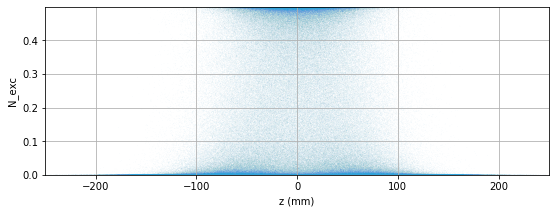

In [52]:
#%output backend='matplotlib' fig='svg' size=200
%output backend='matplotlib' fig='png' size=250
%opts Points [aspect=3]

hv.Points((z*1e3, N_exc), [dim_z,"N_exc"])

Since we treat $N_{exc}$ as the probability of ion excitation, let's randomply select excited atoms according to their $N_{exc}$ value:

For every ion select a random number from 0 to 1:

In [53]:
rnd = np.random.uniform(size=Np)

:Points   [z,rnd]
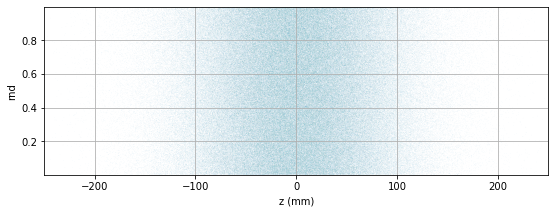

In [54]:
hv.Points((z*1e3, rnd), [dim_z,"rnd"])

And we count the ion as excited if its N_exc value is larger than the rnd value:

In [55]:
Excited = N_exc > rnd

Plot excited ions:

In [56]:
%opts Points.Excited (alpha=0.8, color='black')
%opts Points.Still (alpha=0.3)

:Overlay
   .Still.I   :Points   [z,y]
   .Excited.I :Points   [z,y]
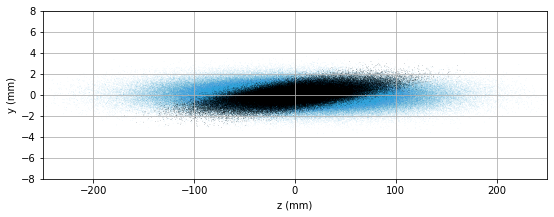

In [57]:
hv.Points((z*1e3, y*1e3), [dim_z,dim_y], group='Still') * \
hv.Points((z[Excited]*1e3, y[Excited]*1e3), [dim_z,dim_y], group='Excited')

:Overlay
   .Still.I   :Points   [z,dp]
   .Excited.I :Points   [z,dp]
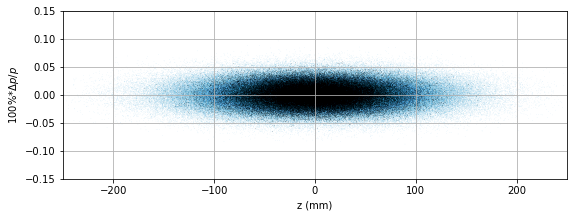

In [58]:
hv.Points((z*1e3, dp*100), [dim_z,dim_dp], group='Still') * \
hv.Points((z[Excited]*1e3, dp[Excited]*100), [dim_z,dim_dp], group='Excited')

In [59]:
print("%.1f%% of all ions are excited." % (100*len(z[Excited])/len(z)))

20.8% of all ions are excited.


### Photon emissions

The effect of photon absorption on the ion momentum in the lab frame can be neglected. We should take into account only the emitted photon. On every turn we will select a random direction of photon emission in the ion's frame of reference. The random polar angle $\theta_1'$ can be obtained as <a href=http://mathworld.wolfram.com/SpherePointPicking.html>arccos of uniformly distributed random number</a> from $-1$ to $+1$. Then using the above expressions we can find the frequency of the scattered photon as well as $\theta_1$ angle between the initial ion momentum and the direction of photon emission in the lab frame. Finally a random azimuthal angle (from $0$ to $2\pi$) is needed to get the direction of photon scattering in the plane which is perpendicular to the initial ion momentum.

In [60]:
# random polar angle in the ion's frame:
costheta = np.random.uniform(-1,+1, size=Np)
theta1p = np.arccos(costheta)

# emitted photon energy in the lab frame:
hw1_emitted = gamma_0*(1+dp) * ( 1 + beta_0*np.cos(theta1p) )*hw0 # eV
# only excited atoms are emitting of course:
hw1_emitted = hw1_emitted*Excited

dp = dp - hw1_emitted/(gamma_0*mc)

:Overlay
   .Still.I   :Points   [z,dp]
   .Excited.I :Points   [z,dp]
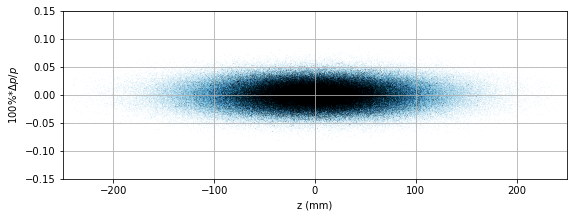

In [61]:
hv.Points((z*1e3, dp*100), [dim_z,dim_dp], group='Still') * \
hv.Points((z[Excited]*1e3, dp[Excited]*100), [dim_z,dim_dp], group='Excited')

Now let's summarize the above theory into the python function to simulate the process of ion excitations and photon emissions in a turn-by-turn simulation.

In [62]:
X = np.matrix([
  x ,
  xp,
  y ,
  yp,
  z ,
  dp
])

In [63]:
def ExciteIons(X, J_l=J_l):
    # Returns a vector of ion states after interaction with the laser: Excited / Not excited.
    
    N_hw = J_l/(hw*1.602e-19) # J_l in joules

    x = X[0].A1; xp = X[1].A1; y = X[2].A1; yp = X[3].A1; z = X[4].A1; dp = X[5].A1
    
    vz = c*beta_0

    vx = vz*xp
    vy = vz*yp
    
    t_col = ((x-ax)*nx + (y-ay)*ny + (z-az)*nz + c*t_l) / (c - (vx*nx+vy*ny+vz*nz)) # sec
    
    x_col = x + vx*t_col # m
    y_col = y + vy*t_col # m
    z_col = z + vz*t_col # m
    
    f_D = gamma_0*(1+dp)*(1+beta_0*np.cos(theta_l))
    omega_l = 2*np.pi/(lambda_l/c)*f_D
    sigma_average = sigma_0*sigma_t/(tau_0*f_D) * \
            np.sqrt(2*np.pi)/4 * \
            np.exp(-np.power( (omega_0 - omega_l)/(sigma_w*f_D) , 2)/2)
    
    x_l = ax + c*(t_col-t_l)*nx
    y_l = ay + c*(t_col-t_l)*ny
    z_l = az + c*(t_col-t_l)*nz
    
    r2 = (x_col-x_l)*(x_col-x_l) + (y_col-y_l)*(y_col-y_l) + (z_col-z_l)*(z_col-z_l)
    
    w = w_0*np.sqrt( 1 + ((x_l-ax)*(x_l-ax) + (y_l-ay)*(y_l-ay) + (z_l-az)*(z_l-az))/(z_R*z_R) )
    
    N_exc = 2*N_hw/(np.pi*w*w)*np.exp(-2*r2/w/w)*sigma_average
    N_exc = (1 - np.exp(-1*(1+g1/g2)*N_exc))/(1+g1/g2)
    
    rnd = np.random.uniform(size=Np)
    
    Excited = N_exc > rnd
    
    return Excited

:Overlay
   .Still.I   :Points   [z,dp]
   .Excited.I :Points   [z,dp]
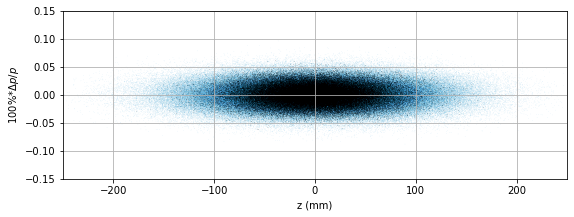

In [64]:
Excited = ExciteIons(X)

hv.Points((z*1e3, dp*100), [dim_z,dim_dp], group='Still') * \
hv.Points((z[Excited]*1e3, dp[Excited]*100), [dim_z,dim_dp], group='Excited')

In [65]:
mJ_points = np.linspace(0, 20, 41) # mJ

In [66]:
excited_fraction = []
for J_mJ in mJ_points: # mJ
    Excited = ExciteIons(X, J_l=J_mJ*1e-3)
    excited_fraction.append( 100*len(z[Excited])/len(z) )

In [67]:
%output backend='matplotlib' fig='svg' size=250
%opts Curve [aspect=2] (linewidth=4)

hv.Curve((mJ_points, excited_fraction), kdims=['Laser pulse energy (mJ)'],
                    vdims=['Fraction of excited ions (%)'],)

:Curve   [Laser pulse energy (mJ)]   (Fraction of excited ions (%))

Saving data:

In [68]:
A = np.array([mJ_points, excited_fraction])
A = np.transpose(A)
np.savetxt("GF-Python_ExitedIons-PulseEnergy.txt", A, 
              delimiter=' ', header='Pulse energy [mJ] | Fraction of excited ions [%]')

In [69]:
#A

Reaching the theoretiucal limit of 50% requires orders of magnitude more powerful laser (due to the large crossing angle):

In [70]:
mJ_points = np.linspace(0, 5000, 51) # mJ

In [71]:
excited_fraction = []
for J_mJ in mJ_points: # mJ
    Excited = ExciteIons(X, J_l=J_mJ*1e-3)
    excited_fraction.append( 100*len(z[Excited])/len(z) )

In [72]:
hv.Curve((mJ_points/1e3, excited_fraction), kdims=['Laser pulse energy (J)'],
                    vdims=['Fraction of excited ions (%)'],)

:Curve   [Laser pulse energy (J)]   (Fraction of excited ions (%))

# Compare to GF-CAIN:

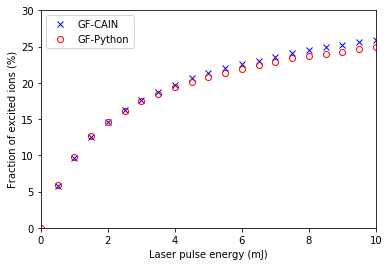

In [73]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

A = np.loadtxt("GF-CAIN_ExitedIons-PulseEnergy.txt", skiprows=1)
B = np.loadtxt("GF-Python_ExitedIons-PulseEnergy.txt", skiprows=1)
#C = np.loadtxt("GF-CMCC_ExitedIons-PulseEnergy.txt", skiprows=1)

f = plt.figure()

plt.plot(A[:,0], A[:,1], "x", label="GF-CAIN",   c='blue')
plt.plot(B[:,0], B[:,1], "o", label="GF-Python", c='red',   mfc='None')
#plt.plot(C[:,0], C[:,1], "s", label="GF-CMCC",   c='green', mfc='None')

plt.xlim(0,10)
plt.ylim(0,30)
plt.xlabel("Laser pulse energy (mJ)")
plt.ylabel("Fraction of excited ions (%)")
plt.legend()
plt.show()

In [74]:
f.savefig("excited_fraction_vs_mJ.pdf", bbox_inches='tight')

## Some technical info:

In [75]:
%load_ext watermark

In [76]:
%watermark --python --date --iversions --machine

holoviews  1.12.3
matplotlib 3.1.1
numpy      1.16.4
2019-09-04 

CPython 3.6.7
IPython 7.6.1

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
CPU cores  : 4
interpreter: 64bit
